In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
batch_size = 256

# Read CSV data into a DataFrame
df = pd.read_csv(f'./gradient_confusion_results_ResNet44_CIFAR10_batch_size_{batch_size}.csv')

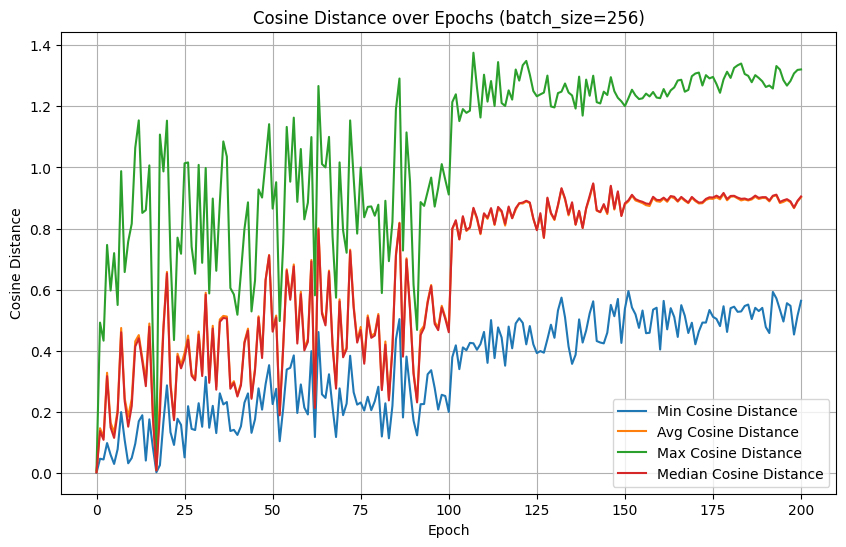

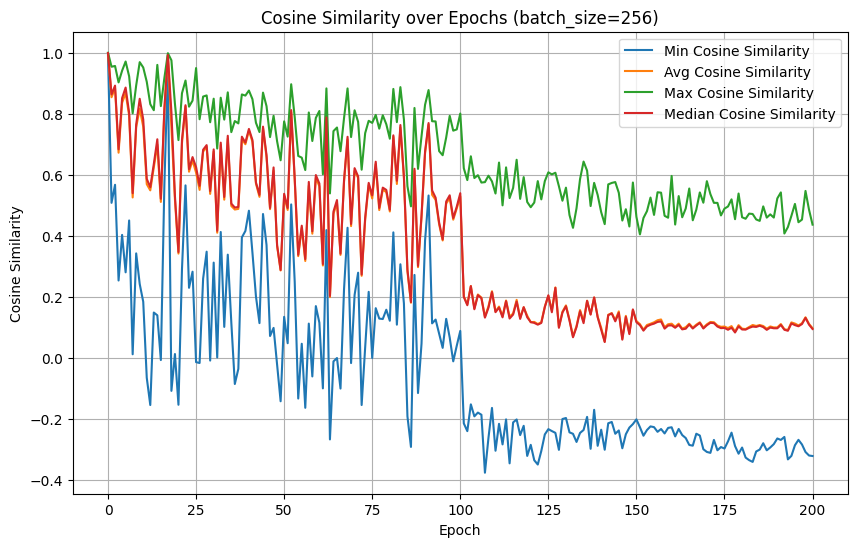

In [12]:
# Plotting the cosine distances
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['min_cosine_distance'], label='Min Cosine Distance')
plt.plot(df['epoch'], df['avg_cosine_distance'], label='Avg Cosine Distance')
plt.plot(df['epoch'], df['max_cosine_distance'], label='Max Cosine Distance')
plt.plot(df['epoch'], df['median_cosine_distance'], label='Median Cosine Distance')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Cosine Distance')
plt.title(f'Cosine Distance over Epochs (batch_size={batch_size})')

# Displaying the legend
plt.legend()

# Save and show plot
plt.grid(True)
plt.savefig(f'./figures/gc_cos_dist_{batch_size}.pdf')
plt.show()

# Plotting the cosine similarities
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['min_cosine_similarity'], label='Min Cosine Similarity')
plt.plot(df['epoch'], df['avg_cosine_similarity'], label='Avg Cosine Similarity')
plt.plot(df['epoch'], df['max_cosine_similarity'], label='Max Cosine Similarity')
plt.plot(df['epoch'], df['median_cosine_similarity'], label='Median Cosine Similarity')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Cosine Similarity')
plt.title(f'Cosine Similarity over Epochs (batch_size={batch_size})')

# Displaying the legend
plt.legend()

# Save and show plot
plt.grid(True)
plt.savefig(f'./figures/gc_cos_sim_{batch_size}.pdf')
plt.show()


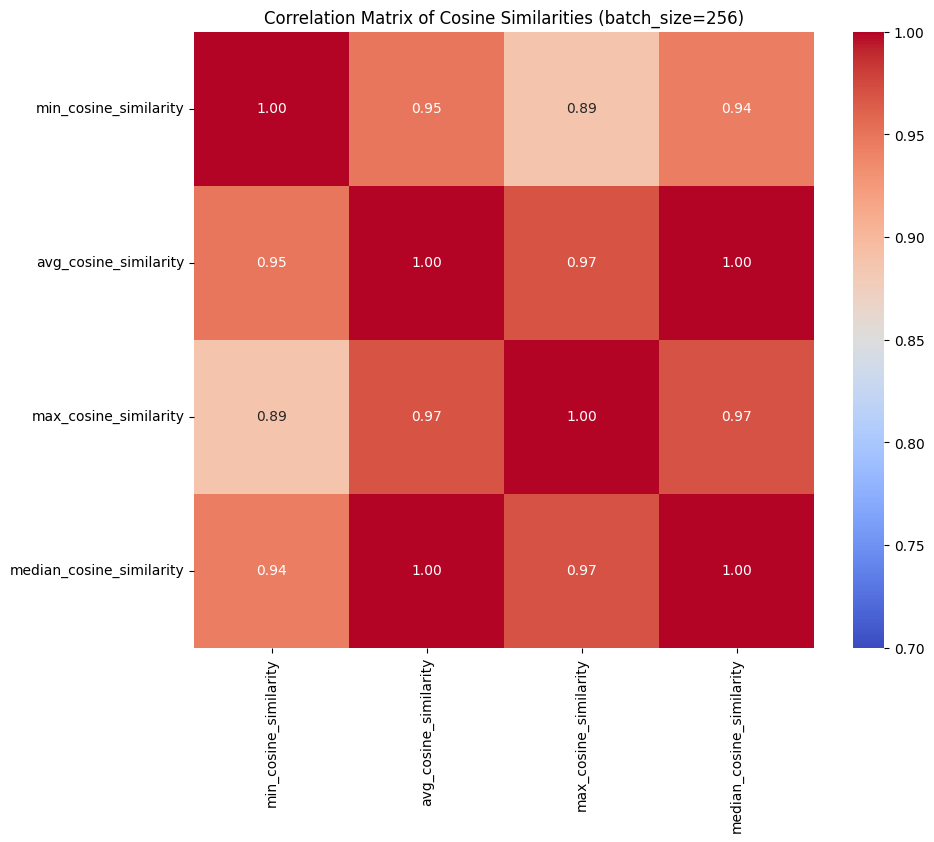

In [20]:
import seaborn as sns

# Calculate the correlation matrix for similarity columns only
similarity_columns = ['min_cosine_similarity', 'avg_cosine_similarity', 'max_cosine_similarity', 'median_cosine_similarity']
correlation_matrix_similarity = df[similarity_columns].corr()

# Plot the heatmap with color scale from 0 to 1
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_similarity, annot=True, cmap='coolwarm', fmt='.2f', vmin=0.7, vmax=1)

# Adding labels and title
plt.title('Correlation Matrix of Cosine Similarities (batch_size=256)')
plt.savefig(f'./figures/gc_correlation_cos_metrics_{batch_size}.pdf')
plt.show()

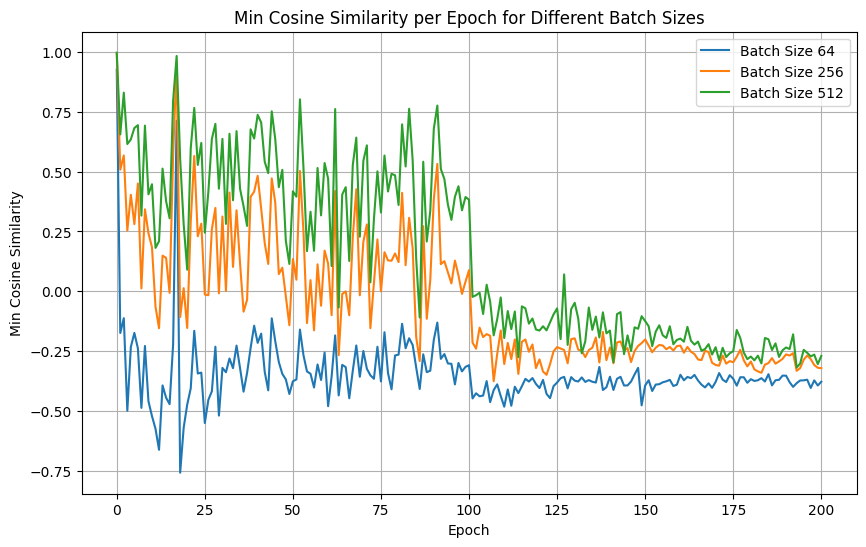

In [19]:
batch_sizes = [64, 256, 512]

# Read CSV data into DataFrames for each batch size
dfs = {}
for size in batch_sizes:
    dfs[size] = pd.read_csv(f'./gradient_confusion_results_ResNet44_CIFAR10_batch_size_{size}.csv')

# Plotting the min cosine similarity for each batch size
plt.figure(figsize=(10, 6))
for size in batch_sizes:
    plt.plot(dfs[size]['epoch'], dfs[size]['min_cosine_similarity'], label=f'Batch Size {size}')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Min Cosine Similarity')
plt.title('Min Cosine Similarity per Epoch for Different Batch Sizes')

# Displaying the legend
plt.legend()

# Show plot
plt.grid(True)
plt.savefig(f'./figures/gc_min_cs_batch_size.pdf')
plt.show()